# AP156 Week 1 (8 Aug 18)

Domingo, Kenneth V.<br />
2015-03116

In [1]:
import scipy.special as sps
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline

<b>1.2 The Nonlinear Pendulum</b>

The energy of a nonlinear pendulum is given by:

\begin{equation}
    E = \frac{m}{2}l^2 \dot{\phi}^2 - mgl\cos{\phi} = -mgl\cos{\phi_0}
\end{equation}

where $m$, $g$, $l$ are constants, and $\phi$ is the displacement angle from equilibrium position. Isolating the constants on one side, setting $\kappa := \frac{E}{mgl}$ and $\sqrt{\frac{l}{g}} := 1$, we have the differential equation

\begin{equation}
    \kappa = \frac{1}{2}\dot{\phi}^2 - \cos{\phi}
\end{equation}

The period $T$ is 4 times the time the pendulum needs to reach its maximum angle $\phi_0$:

\begin{equation}
    T = 4t(\phi_0)
\end{equation}

'

For small values of displacement $\phi$, the potential energy is $\approx$ quadratic. The solution to the equation of motion is a sinusoidal oscillation with period $T = 2\pi\sqrt{\frac{l}{g}}$. For larger amplitudes $\phi_0$, the force becomes a nonlinear function of $\phi$, and $T$ depends of $\phi_0$.

In [2]:
def polarticks_2(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return "0"
    elif N == -1:
        return r"$-\pi/2$"
    elif N == 1:
        return r"$\pi/2$"
    elif N == -2:
        return r"$-\pi$"
    elif N == 2:
        return r"$\pi$"
    elif N%2 < 0:
        return r"$-{0}\pi/2$".format(N)
    elif N%2 > 0 or N%2 < 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)
    
def polarticks_1(value,tick_number):
    N = int(np.round(value/np.pi))
    if N == 0:
        return "0"
    else:
        return r"${0}\pi$".format(N)

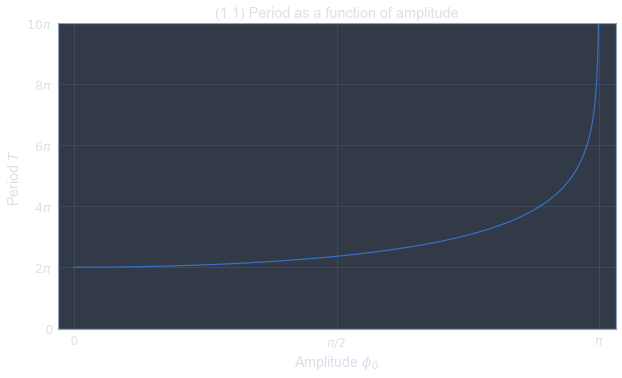

In [3]:
def T(phi0):
    return 4*sps.ellipk(np.sin(phi0/2)**2)

f,ax = mp.subplots(figsize=(10,10*9/16))
phi0 = np.linspace(0,np.pi,1000)
ax.plot(phi0,T(phi0))
ax.xaxis.set_major_locator(mp.MultipleLocator(np.pi/2))
ax.yaxis.set_major_locator(mp.MultipleLocator(2*np.pi))
ax.xaxis.set_major_formatter(mp.FuncFormatter(polarticks_2))
ax.yaxis.set_major_formatter(mp.FuncFormatter(polarticks_1))
mp.ylim(-0.1,np.pi*10)
mp.xlim(-0.1,np.pi+0.1)
mp.xlabel("Amplitude $\phi_0$")
mp.ylabel("Period $T$")
mp.title("(1.1) Period as a function of amplitude")
mp.show()

\begin{equation}
    T = 4\sqrt{\frac{l}{g}} K(\sin{\frac{\phi_0}{2}})
\end{equation}

In [4]:
def psi(t,phi0):
    return sps.ellipj(t,np.sin(phi0/2)**2)[3]

def sinepsi(t,phi0):
    return sps.ellipj(t,np.sin(phi0/2)**2)[0]

def phinorm(x,phi0):
    return 2*np.arcsin(np.sin(phi0/2) * sinepsi(x*T(phi0),phi0))/phi0

phi0 = [ np.pi/10 , 4*np.pi/5 , 19*np.pi/20 , 99*np.pi/100 , 999*np.pi/1000 ]
x = np.linspace(0,1,100)

def ff(x):
    fflist = []
    for i in range(5):
        fflist.append(phinorm(x,phi0[i]))
    return fflist

flist = ff(x)

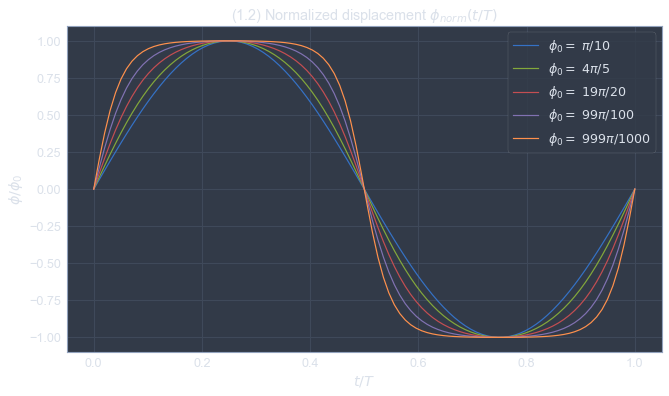

In [5]:
xx = np.linspace(0,1,100)
xleg = [ "$\pi/10$", "$4\pi/5$", "$19\pi/20$", "$99\pi/100$", "$999\pi/1000$" ]
mp.figure(figsize=(6*16/9,6))
for i in range (5):
    mp.plot(xx,flist[i], label=r"$\phi_0 =$ {0}".format(xleg[i]))
mp.xlabel("$t/T$")
mp.ylabel("$\phi/\phi_0$")
mp.title("(1.2) Normalized displacement $\phi_{norm}(t/T)$")
mp.legend()
#mp.xlim(-1.05,1.05)
mp.show()

\begin{equation}
    b_s = \frac{1}{\sqrt{N}} \sum_{r=1}^N \phi(t_r) \exp{\Big(2\pi i \frac{(s-1)(r-1)}{N}\Big)}
\end{equation}

Symmetry at:
\begin{equation}
    \phi\Big(\frac{T}{2} + t\Big) = -\phi(t)
\end{equation}

In [6]:
def dft(y):
    N = len(y)
    b = np.zeros(N, complex)
    s = np.arange(N)
    for r in range(1,N):
        b[r] = sum(y*np.exp(2*np.pi*1j*(s-1)*(r-1)/N))
    return b

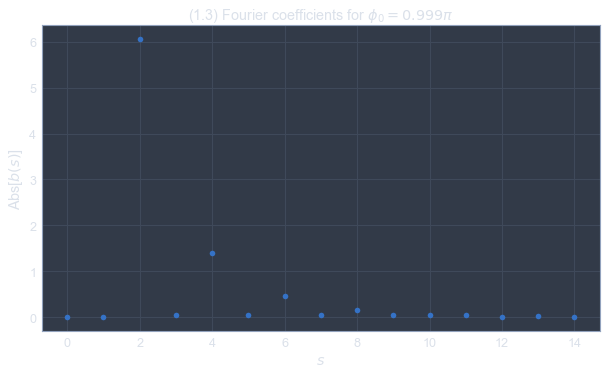

In [7]:
foulist = np.abs(dft(flist[-1]))/np.sqrt(len(flist[-1]))
mp.figure(figsize=(10,10*9/16))
mp.plot(foulist[:15],"o")
mp.xlabel("$s$")
mp.ylabel("Abs[$b(s)$]")
mp.title("(1.3) Fourier coefficients for $\phi_0 = 0.999\pi$")
mp.show()

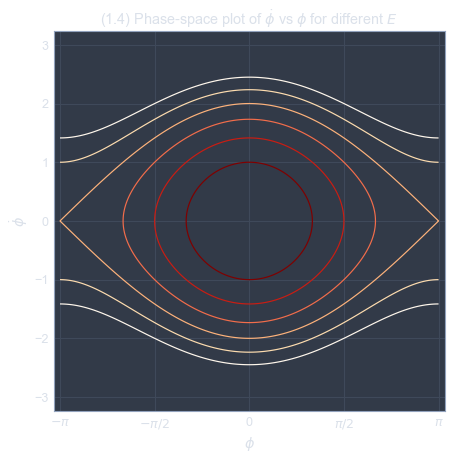

In [8]:
t = np.linspace(-np.pi,np.pi,2000)

def E(phi,dphi):
    return (dphi**2)/2 - np.cos(phi)

X1,Y1 = np.meshgrid(t,t)
Z1 = E(X1,Y1)

fig, ax = mp.subplots(figsize=(7,7))
kappa = [-1/2, 0, 1/2, 1, 3/2, 2]
ax.contour(X1, Y1, Z1, levels=kappa, cmap="OrRd_r")

ax.set_xlim(-np.pi-0.1,np.pi+0.1)
ax.set_ylim(-np.pi-0.1,np.pi+0.1)
ax.xaxis.set_major_locator(mp.MultipleLocator(np.pi/2))
ax.xaxis.set_major_formatter(mp.FuncFormatter(polarticks_2))
mp.xlabel("$\phi$")
mp.ylabel("$\dot{\phi}$")
mp.title("(1.4) Phase-space plot of $\dot{\phi}$ vs $\phi$ for different $E$")
mp.show()